#Supervised and Unsupervised machine learning methods

## Importing Libraries

In [ ]:
import os
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, Concatenate
from tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score, f1_score,\
                            accuracy_score, balanced_accuracy_score,classification_report,\
                            confusion_matrix

## EDA

In [ ]:
df=pd.read_csv('./creditcard.csv')
df=df.drop('Time',axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

PCA Transformation: The description of the data says that all the features went through a PCA transformation (Except for time and amount).  
Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled.

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# checking for duplicate values
print(f"Dataset has {df.duplicated().sum()} duplicate rows")
# dropping duplicate rows
df.drop_duplicates(inplace=True)

Dataset has 9144 duplicate rows


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275663 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     275663 

There is no null values

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<Axes: xlabel='Class', ylabel='count'>

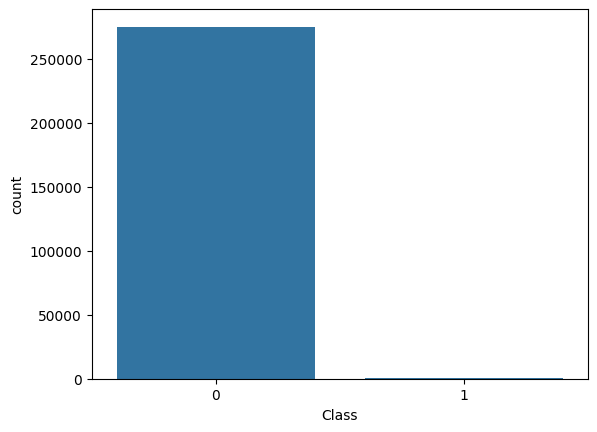

In [ ]:
sns.countplot(data=df,x='Class')

In [ ]:
df.drop('Class',axis=1).skew()

,0
V1,-3.273070
V2,-4.653486
V3,-2.216730
V4,0.681387
V5,-2.458790
V6,1.867576
V7,2.877722
V8,-8.292631
V9,0.550965
V10,1.242165


<Axes: xlabel='Amount', ylabel='Density'>

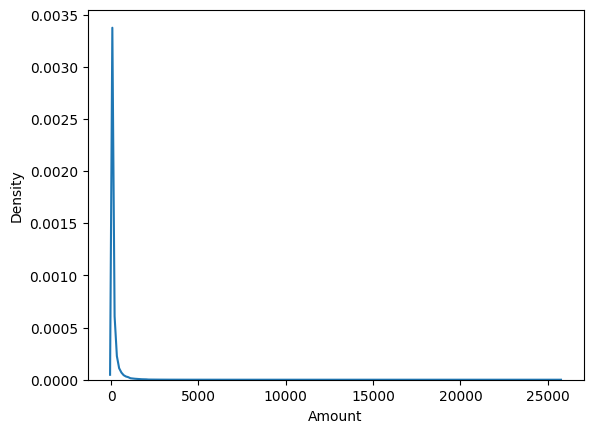

In [ ]:
sns.kdeplot(df['Amount'])

<Axes: xlabel='Amount', ylabel='Density'>

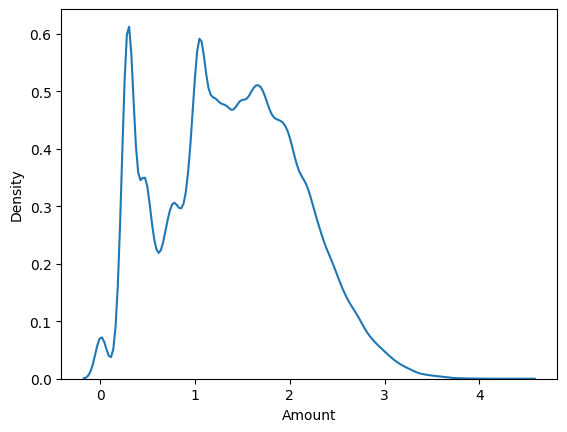

In [ ]:
df['Amount'] = df['Amount'].apply(lambda x: np.log10(x+1))
sns.kdeplot(df['Amount'])

## Creating a sub sample

What - create a[](http://) df with equal number of fraud and non fraud samples  
Why - Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the target. By having an imbalance dataframe we are not able to see the true correlations between the class and features

In [ ]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

subsample = pd.concat([fraud_df, non_fraud_df])
new_df = subsample.sample(frac=1, random_state=42)

### Correlation

In [ ]:
corr = df.corr()
fig=px.imshow(corr, aspect="auto" ,color_continuous_scale='RdBu_r')
fig.show()

In [ ]:
corr = new_df.corr()
fig=px.imshow(corr, aspect="auto" ,color_continuous_scale='RdBu_r')
fig.show()

Negative Correlations: V17, V14, V12 and V10 are negatively correlated.  
Positive Correlations: V2, V4, V11 are positively correlated.

In [ ]:
# Calculate absolute correlation matrix (optional: choose df or new_df)
corr_matrix = new_df.corr().abs()

# Select upper triangle of correlation matrix to avoid duplicates and self-correlation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set threshold
threshold = 0.9

# Find feature pairs with high correlation
high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2])
                   for col1 in upper.columns
                   for col2 in upper.columns
                   if (upper.loc[col1, col2] > threshold)]

# Display results
print("Highly Correlated Feature Pairs (|r| > 0.9):")
for f1, f2, corr_value in high_corr_pairs:
    print(f"{f1} ↔ {f2}: r = {corr_value:.2f}")

Highly Correlated Feature Pairs (|r| > 0.9):
V16 ↔ V17: r = 0.95
V17 ↔ V18: r = 0.94


Reference-https://data36.com/correlation-definition-calculation-corr-pandas/

### TSNE

In [ ]:
from sklearn.manifold import TSNE
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

In [ ]:
fig=px.scatter(x=X_reduced_tsne[:,0], y=X_reduced_tsne[:,1], color=y)
fig.show()

Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately

Reference- https://www.geeksforgeeks.org/machine-learning/difference-between-pca-vs-t-sne/

Note-ChatGPT was used to help understand the results using WebSearch Feature.

## Scaling

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Class', axis=1))
y = df['Class'].values
print(X.shape, y.shape)

(275663, 29) (275663,)


## Splitting the data

we want to test our models on the original testing set not on the testing set created from GAN. The main goal is to fit the model in the generated data, and test it on the original testing set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Testing baseline model with original data

#Supervised Learning Methods

In [ ]:
# === Imports ===
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb

# reproducibility
np.random.seed(42)

# class imbalance helper for XGB
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / max(pos, 1)

def get_score_estimate(model, X):
    """Return score for class=1: predict_proba if available, else decision_function."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        return model.decision_function(X)
    else:
        raise ValueError("Model has neither predict_proba nor decision_function.")

#  models
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            solver="liblinear", class_weight="balanced",
            random_state=42, max_iter=1000
        ))
    ]),
    "SVM (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(
            kernel="rbf", probability=True,
            class_weight="balanced", random_state=42
        ))
    ]),
    "XGBoost": XGBClassifier(
        n_estimators=500, max_depth=4, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.9,
        scale_pos_weight=scale_pos_weight,
        eval_metric="logloss",
        tree_method="hist", random_state=42, n_jobs=-1
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=500, max_depth=None, min_samples_split=2,
        class_weight="balanced_subsample",
        random_state=42, n_jobs=-1
    ),
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=500, max_depth=-1, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.9,
        class_weight="balanced", random_state=42, n_jobs=-1
    )
}

# Train, score, and report AUCs
results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_score = get_score_estimate(clf, X_test)
    roc = roc_auc_score(y_test, y_score)
    pr  = average_precision_score(y_test, y_score)
    results[name] = {"ROC-AUC": roc, "PR-AUC": pr}
    print(f"{name}: ROC-AUC={roc:.4f} | PR-AUC={pr:.4f}")



Logistic Regression: ROC-AUC=0.9969 | PR-AUC=0.6906
SVM (RBF): ROC-AUC=0.9771 | PR-AUC=0.4346
XGBoost: ROC-AUC=0.9971 | PR-AUC=0.8588
RandomForest: ROC-AUC=0.9754 | PR-AUC=0.8148
[LightGBM] [Info] Number of positive: 378, number of negative: 220152
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 220530, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



LightGBM: ROC-AUC=0.9780 | PR-AUC=0.8295


Logistic Regression: ROC-AUC=0.9969 | PR-AUC=0.6906
SVM (RBF): ROC-AUC=0.9771 | PR-AUC=0.4346
XGBoost: ROC-AUC=0.9971 | PR-AUC=0.8588
RandomForest: ROC-AUC=0.9754 | PR-AUC=0.8148
[LightGBM] [Info] Number of positive: 378, number of negative: 220152
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 220530, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

LightGBM: ROC-AUC=0.9780 | PR-AUC=0.8295

Conclusion

XGBoost is the top-performing model, offering both excellent ROC-AUC and the highest PR-AUC, making it the most reliable for imbalanced classification.

LightGBM and Random Forest are competitive alternatives, with LightGBM slightly ahead on PR-AUC.

Logistic Regression, while strong on ROC-AUC, does not maintain high precision under imbalance.

SVM is not recommended for this dataset.

Overall: XGBoost > LightGBM ≈ Random Forest > Logistic Regression > SVM.

Note-ChatGPT was used to help understand the results for all supervised methods.

Reference-[A Comparison Study of Credit Card Fraud Detection: Supervised versus Unsupervised](https://arxiv.org/abs/1904.10604)

#Unsupervised Learning Methods

# Isolation Forest

Estimated contamination from train labels: 0.001729

[Isolation Forest] ROC-AUC: 0.9537
[Isolation Forest] PR-AUC:  0.1373

Classification report @contamination threshold:
              precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987     56864
           1     0.2525    0.2551    0.2538        98

    accuracy                         0.9974     56962
   macro avg     0.6256    0.6269    0.6263     56962
weighted avg     0.9974    0.9974    0.9974     56962



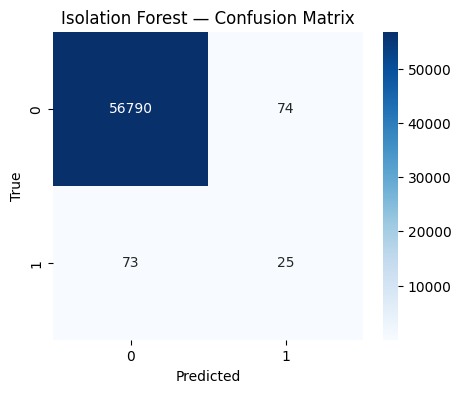


[One-Class SVM] ROC-AUC: 0.9524
[One-Class SVM] PR-AUC:  0.3537

Classification report @contamination threshold:
              precision    recall  f1-score   support

           0     0.9991    0.9991    0.9991     56864
           1     0.4646    0.4694    0.4670        98

    accuracy                         0.9982     56962
   macro avg     0.7319    0.7342    0.7330     56962
weighted avg     0.9982    0.9982    0.9982     56962



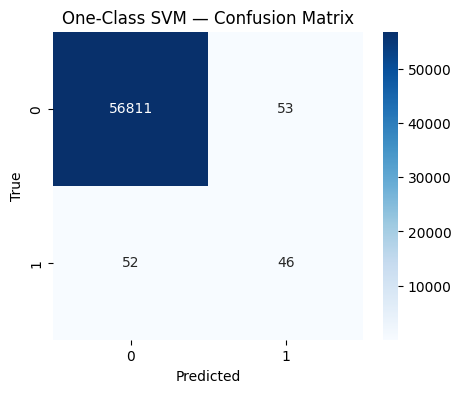


=== Summary (higher is better) ===
Isolation Forest: ROC-AUC=0.9537, PR-AUC=0.1373
One-Class SVM:   ROC-AUC=0.9524, PR-AUC=0.3537


In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./creditcard.csv').drop('Time', axis=1)
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Contamination estimate (positive rate in train). F
contamination = y_train.mean()
print(f"Estimated contamination from train labels: {contamination:.6f}")


def evaluate_unsupervised(y_true, anomaly_scores, title, contamination):
    roc = roc_auc_score(y_true, anomaly_scores)
    pr  = average_precision_score(y_true, anomaly_scores)
    print(f"\n[{title}] ROC-AUC: {roc:.4f}")
    print(f"[{title}] PR-AUC:  {pr:.4f}")

    # Threshold by contamination quantile on test scores
    thr = np.quantile(anomaly_scores, 1 - contamination if contamination > 0 else 0.995)
    y_pred = (anomaly_scores >= thr).astype(int)

    print("\nClassification report @contamination threshold:")
    print(classification_report(y_true, y_pred, digits=4))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.title(f"{title} — Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.show()

    return {"roc_auc": roc, "pr_auc": pr, "threshold": thr}

# Isolation Forest (unsupervised)
iso = IsolationForest(
    n_estimators=200,
    contamination=contamination if contamination > 0 else 'auto',
    max_samples='auto',
    random_state=42,
    n_jobs=-1
)
# Train only on (assumed) normal data for purer unsupervised behavior:
iso.fit(X_train_scaled[y_train == 0])


# Convert to anomaly score where larger means "more anomalous"
scores_iso = -iso.decision_function(X_test_scaled)
res_iso = evaluate_unsupervised(y_test, scores_iso, "Isolation Forest", contamination)

# === 3) One-Class SVM (unsupervised) ===
ocsvm = OneClassSVM(
    kernel='rbf',
    nu=max(contamination, 1e-4),  # ensure > 0
    gamma='scale'
)
# Train on normal data only
ocsvm.fit(X_train_scaled[y_train == 0])

# decision_function: larger is more normal -> flip sign
scores_ocsvm = -ocsvm.decision_function(X_test_scaled)
res_ocsvm = evaluate_unsupervised(y_test, scores_ocsvm, "One-Class SVM", contamination)


print("\n=== Summary (higher is better) ===")
print(f"Isolation Forest: ROC-AUC={res_iso['roc_auc']:.4f}, PR-AUC={res_iso['pr_auc']:.4f}")
print(f"One-Class SVM:   ROC-AUC={res_ocsvm['roc_auc']:.4f}, PR-AUC={res_ocsvm['pr_auc']:.4f}")



Interpretation

ROC-AUC: Both models perform similarly (~0.95), indicating good ranking ability in distinguishing anomalies from normals.

PR-AUC: The difference is large — One-Class SVM (0.354) >> Isolation Forest (0.137), meaning SVM is far more effective in the highly imbalanced setting (rare positives).

Classification performance:

Isolation Forest has very low recall (0.26), detecting only a quarter of true anomalies.

One-Class SVM doubles the recall (0.47) and precision (0.46), leading to a much stronger F1 score.

Conclusion

One-Class SVM outperforms Isolation Forest on this dataset in terms of minority-class detection.

Both achieve high overall accuracy due to class imbalance, but PR-AUC and recall highlight the SVM’s clear advantage.

Isolation Forest may still be useful as a fast, lightweight baseline, but it struggles to capture anomalies compared to SVM.

Note-ChatGPT was used to help understand the results for the above 2 methods in unsupervised

Reference-[A Comparison Study of Credit Card Fraud Detection: Supervised versus Unsupervised](https://arxiv.org/abs/1904.10604), https://medium.com/@pinakdatta/fraud-detection-isolation-forests-lof-explained-228828bd496b

# Autoencoder

In [ ]:
df = pd.read_csv('./creditcard.csv').drop('Time', axis=1)

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1, stratify=df['Class'])
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=2, stratify=train_df['Class'])
#distribution of a specified column is preserved in both the training and testing datasets
y_train = train_df.pop('Class').values
y_val = val_df.pop('Class').values
y_test = test_df.pop('Class').values

In [ ]:
qt_transform = QuantileTransformer(output_distribution='normal')
X_train = qt_transform.fit_transform(train_df)
X_val = qt_transform.transform(val_df)
X_test = qt_transform.transform(test_df)

## Autoencoder Architecture

In [ ]:
def encoder(inputs):
    x = inputs
    for i in range(3):
        x = keras.layers.Dense(128//2**i, activation=None, name=f'encoder_dense_{i}')(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.LeakyReLU(0.2)(x)
        x = keras.layers.Dropout(0.05)(x)

    # final bottleneck layer
    x = keras.layers.Dense(16, activation=None, name='bottleneck')(x)
    return x

def decoder(inputs, input_dim):
    x = inputs

    for i in range(3):
        x = keras.layers.Dense(128//2**(2-i), activation=None, name=f'decoder_dense_{i}')(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.ReLU()(x)
        x = keras.layers.Dropout(0.05)(x)
    # output
    x = keras.layers.Dense(input_dim, activation=None)(x)
    return x

def dense_autoencoder(input_dim):
    inputs = keras.Input(shape=(input_dim,))
    encoder_output = encoder(inputs)
    decoder_output = decoder(encoder_output, input_dim) #

    model = keras.Model(inputs=inputs, outputs=decoder_output)


    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=0.01,
        ),
        loss='mean_squared_error'
    )

    return model

In [ ]:
keras.backend.clear_session()
ae_model = dense_autoencoder(X_train.shape[1]) #29 cols
ae_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_0 (Dense)         │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_1 (Dense)         │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_2 (Dense)         │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_0 (Dense)         │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_1 (Dense)         │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 31,213 (121.93 KB)

 Trainable params: 30,317 (118.43 KB)

 Non-trainable params: 896 (3.50 KB)

## Training Autoencoder

In [ ]:
EPOCHS = 100
BATCH_SIZE = 256


early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=True,
    patience=15,
    restore_best_weights=True
)
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    verbose=True,
    patience=5,
    factor= 0.1, #if the current learning rate is 0.01 and the factor is 0.1, the new learning rate will be 0.001
    min_lr = 1e-5
)

history = ae_model.fit(
    X_train[y_train==0,:], # filtering out non-fraudulant data and used for training
    X_train[y_train==0,:],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    callbacks = [early_stopping, reduce_lr],
    validation_data=(X_val[y_val==0], X_val[y_val==0])
)

Epoch 1/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.4787 - val_loss: 0.1791 - learning_rate: 0.0100
Epoch 2/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.2454 - val_loss: 0.1276 - learning_rate: 0.0100
Epoch 3/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.2235 - val_loss: 0.1130 - learning_rate: 0.0100
Epoch 4/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.2116 - val_loss: 0.1038 - learning_rate: 0.0100
Epoch 5/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.2047 - val_loss: 0.0942 - learning_rate: 0.0100
Epoch 6/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.1967 - val_loss: 0.0910 - learning_rate: 0.0100
Epoch 7/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.1893 - val_loss: 0.0845 - learning_rate: 0.0100
Epoch 8/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.1854 - val_loss: 0.0812 - learning_rate: 0.0100
Epoch 9/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.1823 - val_loss: 0.0780 - learning

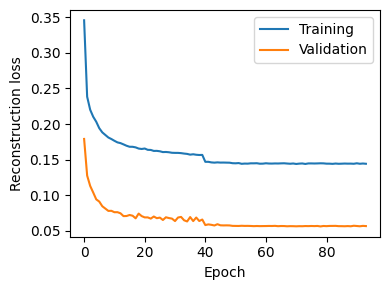

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(4,3))

graph = axs.plot(history.epoch, history.history['loss'], label='Training')
graph = axs.plot(history.epoch, history.history['val_loss'], label='Validation')
graph = axs.legend()
graph = axs.set_xlabel('Epoch')
graph = axs.set_ylabel('Reconstruction loss')
fig.tight_layout()

## Defining Reconstruction loss

In [ ]:
def get_reconst_loss(X):
    X_reconst = ae_model.predict(X, batch_size=256)
    return (
        ((X-X_reconst)**2).sum(axis=1)
    )

### Plotting Reconstruction loss for fraud and non-fraud transactions

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


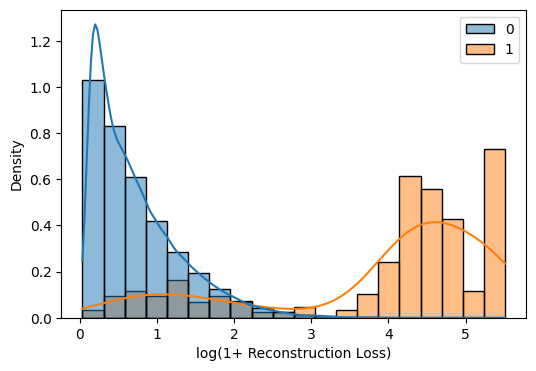

In [ ]:
reconst_train = get_reconst_loss(X_train)

fig, ax = plt.subplots(1,1, figsize=(6,4))
graph = sns.histplot(
    x=np.log1p(reconst_train), #applies log(1+x) transformation,for stabilizing skewed distributions
    hue=y_train,
    bins=20,
    stat='density', #Normalizes the histogram to show a density curve instead of raw counts
    kde=True,
    common_norm=False,
    alpha = 0.5, #Sets transparency for the histogram bars
    ax=ax
)
graph = ax.set_xlabel('log(1+ Reconstruction Loss)')

We are training the autoencoder only on the non-fraud samples so it minimizes the reconstruction loss during training by extracting the main features and reconstructing it. But when we pass a fraud transaction whose main features are different from non-fraud, the reconstruction loss will be high. So we can define a thereshold to classify fraud and non-fraud transactions

In [ ]:
reconst_val = get_reconst_loss(X_val)
reconst_test = get_reconst_loss(X_test)

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Thershold for reconstruction error - As we decrease the thereshold the chance of predicting fraud transaction increases but number of false alarm also increases so we need to decide the sweet spot for the thereshold  
Usually, not identifying a fradulent transacation is considered more costly than raising a false alarm

In [ ]:
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_recall_curve, roc_curve
)

# Use log1p(loss) as the anomaly score (stabilizes scale; higher = more anomalous)
scores_test = np.log1p(reconst_test).astype(float)


roc = roc_auc_score(y_test, scores_test)
ap  = average_precision_score(y_test, scores_test)
print(f"Autoencoder — ROC-AUC: {roc:.4f}")
print(f"Autoencoder — PR-AUC (Average Precision): {ap:.4f}")


Autoencoder — ROC-AUC: 0.9769
Autoencoder — PR-AUC (Average Precision): 0.7912


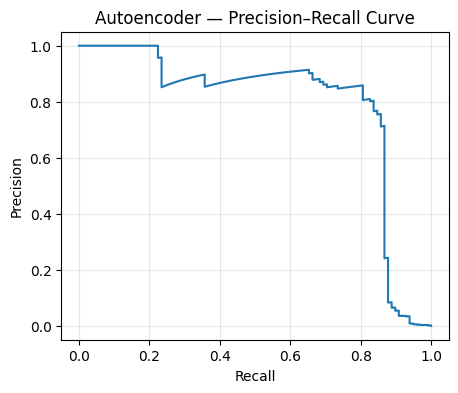

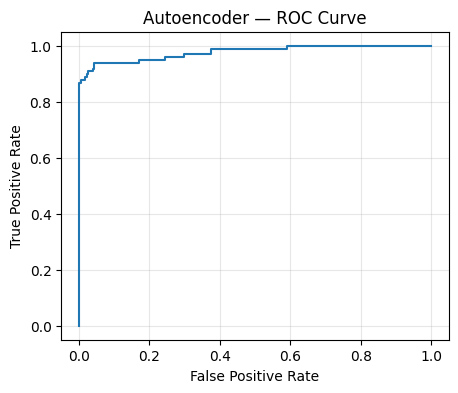

In [ ]:

prec, rec, pr_th = precision_recall_curve(y_test, scores_test)
fpr, tpr, roc_th = roc_curve(y_test, scores_test)

plt.figure(figsize=(5,4))
plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Autoencoder — Precision–Recall Curve")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("Autoencoder — ROC Curve")
plt.grid(True, alpha=0.3)
plt.show()


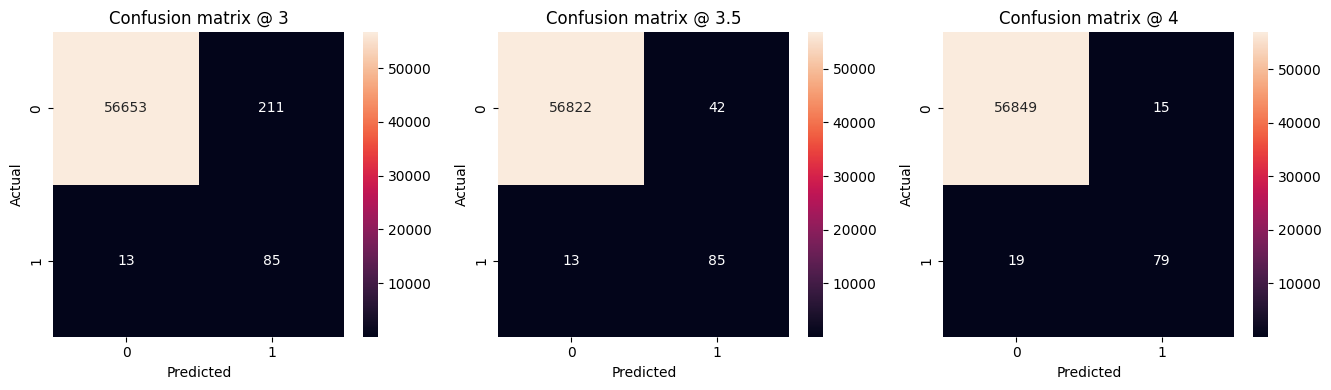

In [ ]:
thresholds = [3, 3.5, 4]

fig, axs = plt.subplots(1, len(thresholds), figsize=(4.5*len(thresholds), 4))
for i, threshold in enumerate(thresholds):
    _ = sns.heatmap(confusion_matrix(y_test, np.log1p(reconst_test) > threshold), annot=True, ax=axs[i], fmt='g')
    _ = axs[i].set_ylabel('Actual')
    _ = axs[i].set_xlabel('Predicted')
    _ = axs[i].set_title(f'Confusion matrix @ {threshold}')

fig.tight_layout()

Performance Summary

ROC-AUC: 0.9769 → very strong separation between normal and anomalous samples.

PR-AUC (AP): 0.7912 → much better than Isolation Forest (0.137) and One-Class SVM (0.354), showing strong performance under severe class imbalance.

Confusion Matrices (threshold tuning):

At threshold 3.0, recall is highest (85/98 anomalies caught) but with more false positives.

At threshold 3.5, recall remains the same (85) with far fewer false positives → best trade-off.

At threshold 4.0, fewer false positives (15) but recall drops (79/98 anomalies).

Interpretation

The training/validation reconstruction loss curves show convergence with no overfitting — validation stabilizes lower than training (a good sign).

The reconstruction loss distribution is clearly separated between normal (low loss) and anomalies (high loss).

The ROC and PR curves confirm the autoencoder is effective at ranking anomalies.

Threshold selection matters: around 3.5 gives the best precision–recall balance.

Note-ChatGPT was used to help understand the results for autoencoders

Reference-[A Comparison Study of Credit Card Fraud Detection: Supervised versus Unsupervised](https://arxiv.org/abs/1904.10604), A[nomaly detection using autoencoders with nonlinear dimensionality reduction](https://doi.org/10.1145/2689746.2689747), https://www.kaggle.com/code/deepaksurana/fraud-detection-using-autoencoders-in-keras